<a href="https://colab.research.google.com/github/jagritirai223/Employee-Attrition-TwiLearn/blob/main/EmployeeAttrition_TwiLearn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

XYZ company which was established a few years back is facing around a 15% attrition rate for
a couple of years. And it's majorly affecting the company in many aspects. In order to
understand why employees are leaving the company and reduce the attrition rate XYZ
company has approached an HR analytics consultancy for analyzing the data they have. You
are playing the HR analyst role in this project and building a dashboard which can help the
organization in making data-driven decisions.


# Data Exploration and Cleaning

At first we proceed with data cleaning and exploration for the dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report

In [ ]:
import statsmodels.api as sm

In [ ]:
attrition_data = pd.read_csv('/content/drive/MyDrive/TwiLearn Datasets/Attrition data.csv')

In [ ]:
attrition_data.shape

(4410, 29)

In [ ]:
attrition_data.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [ ]:
attrition_data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
attrition_data.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

Here we have dropped people below the age of 20. The chance of people working with age below 20, are comparatively less, as most students graduate at the age of 20-21 from their undergraduate degree.

In [ ]:
attrition_data = attrition_data.drop(attrition_data[attrition_data['Age']<20].index)
attrition_data

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


Dropping unnecessary columns

In [ ]:
attrition_data = attrition_data.drop(['EmployeeID','Over18'],axis=1)
attrition_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,1,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,1,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,2,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,1,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


Checking for unique values in the dataset

In [ ]:
for x in attrition_data.columns:
  print(x,':',len(attrition_data[x].unique()))

Age : 41
Attrition : 2
BusinessTravel : 3
Department : 3
DistanceFromHome : 29
Education : 5
EducationField : 6
EmployeeCount : 1
Gender : 2
JobLevel : 5
JobRole : 9
MaritalStatus : 3
MonthlyIncome : 1334
NumCompaniesWorked : 11
PercentSalaryHike : 15
StandardHours : 1
StockOptionLevel : 4
TotalWorkingYears : 41
TrainingTimesLastYear : 7
YearsAtCompany : 37
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18
EnvironmentSatisfaction : 5
JobSatisfaction : 5
WorkLifeBalance : 5
JobInvolvement : 4
PerformanceRating : 2


Here we are checking for unique values in the dataset in each column. We can ignore columns with 1 unique column as it might not contribute to attrition rates in the dataset

In [ ]:
attrition_data = attrition_data.drop(['EmployeeCount','StandardHours','NumCompaniesWorked'],axis=1)
attrition_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [ ]:
attrition_data['EnvironmentSatisfaction'].fillna(attrition_data['EnvironmentSatisfaction'].mean(), inplace=True)
attrition_data['JobSatisfaction'].fillna(attrition_data['JobSatisfaction'].mean(), inplace=True)
attrition_data['WorkLifeBalance'].fillna(attrition_data['WorkLifeBalance'].mean(), inplace=True)

We cannot completely ignore employee reviews such as environment satisfaction, job satisfaction and work life balance. Hence we fill those incomplete data with the mean value of the column.

In [ ]:
attrition_data = attrition_data.dropna()

In [ ]:
attrition_data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [ ]:
categorical_cols = list(attrition_data.select_dtypes(include=['object']).columns)
numerical_cols = list(attrition_data.select_dtypes(exclude=['object']).columns)

print("Categorical Columns:",end=" ")
for col in categorical_cols:
    print(col,end=", ")

print("\nNumerical Columns:",end=" ")
for col in numerical_cols:
    print(col,end=", ")

categorical_cols.remove('Attrition')

Categorical Columns: Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, 
Numerical Columns: Age, DistanceFromHome, Education, JobLevel, MonthlyIncome, PercentSalaryHike, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance, JobInvolvement, PerformanceRating, 

Before performing classification analysis on the dataset, we are transforming all the categorical columns in the dataset using one hot encoding. We leave out the Attrition column as it is our target variable.

In [ ]:
from sklearn import preprocessing
attrition_data = pd.get_dummies(attrition_data, columns=categorical_cols)
label_encoder = preprocessing.LabelEncoder()

attrition_data['Attrition']= label_encoder.fit_transform(attrition_data['Attrition'])

attrition_data['Attrition'].unique()
print(attrition_data.head())

   Age  Attrition  DistanceFromHome  Education  JobLevel  MonthlyIncome  \
0   51          0                 6          2         1         131160   
1   31          1                10          1         1          41890   
2   32          0                17          4         4         193280   
3   38          0                 2          5         3          83210   
4   32          0                10          1         1          23420   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 11                 0                1.0   
1                 23                 1                6.0   
2                 15                 3                5.0   
3                 11                 3               13.0   
4                 12                 2                9.0   

   TrainingTimesLastYear  ...  JobRole_Laboratory Technician  JobRole_Manager  \
0                      6  ...                              0                0   
1                   

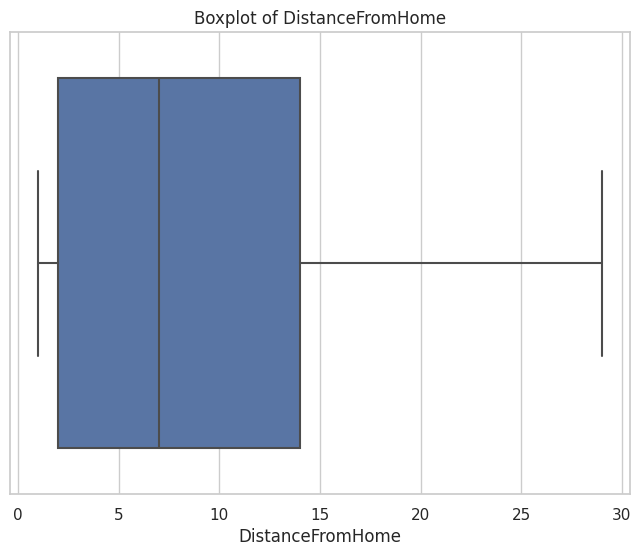

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.boxplot(x='DistanceFromHome', data=attrition_data, orient="h")

plt.title("Boxplot of DistanceFromHome")
plt.xlabel("DistanceFromHome")

plt.show()

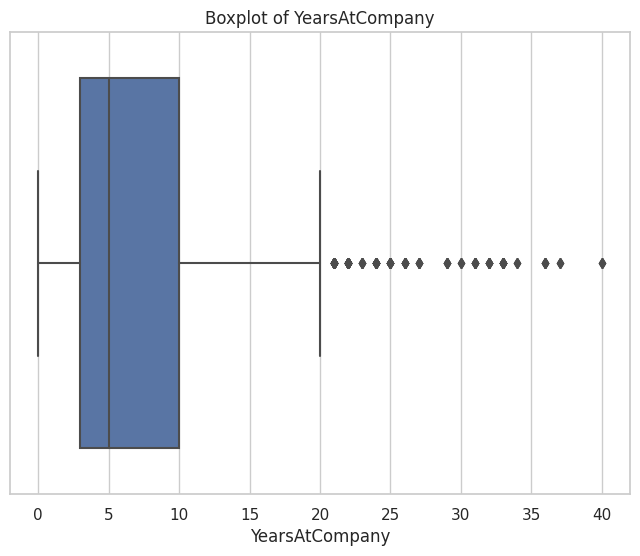

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.boxplot(x='YearsAtCompany', data=attrition_data, orient="h")

plt.title("Boxplot of YearsAtCompany")
plt.xlabel("YearsAtCompany")

plt.show()

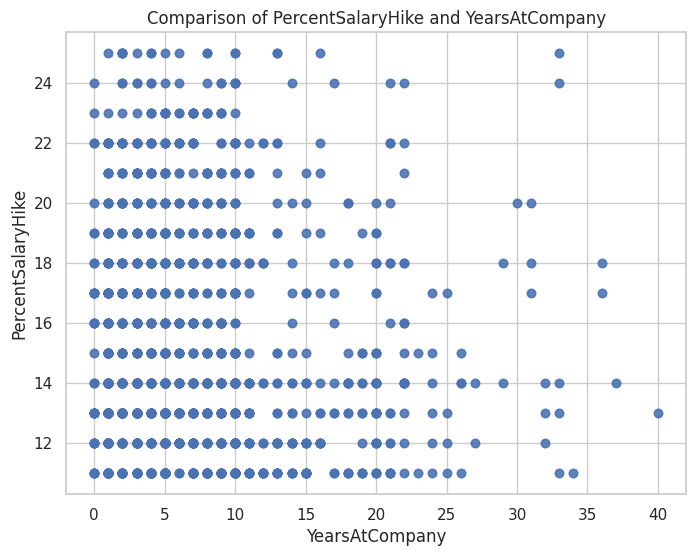

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(attrition_data['YearsAtCompany'], attrition_data['PercentSalaryHike'], alpha=0.5)
plt.title("Comparison of PercentSalaryHike and YearsAtCompany")
plt.xlabel("YearsAtCompany")
plt.ylabel("PercentSalaryHike")

plt.grid(True)

plt.show()

# Selecting Important columns from the dataset

In [ ]:
correlation_matrix = attrition_data.corr()
correlation_matrix['Attrition']


Age                                 -0.137924
Attrition                            1.000000
DistanceFromHome                    -0.001775
Education                           -0.015366
JobLevel                            -0.004102
MonthlyIncome                       -0.033833
PercentSalaryHike                    0.025029
StockOptionLevel                    -0.010851
TotalWorkingYears                   -0.156116
TrainingTimesLastYear               -0.051656
YearsAtCompany                      -0.121988
YearsSinceLastPromotion             -0.024276
YearsWithCurrManager                -0.143508
EnvironmentSatisfaction             -0.100939
JobSatisfaction                     -0.105452
WorkLifeBalance                     -0.076790
JobInvolvement                      -0.022404
PerformanceRating                    0.019960
BusinessTravel_Non-Travel           -0.079771
BusinessTravel_Travel_Frequently     0.111750
BusinessTravel_Travel_Rarely        -0.043713
Department_Human Resources        

At first we perform correlation analysis on the dataset. For this correlation analysis we decided to set the value of p as 0.05. However, doing so, we see that column MonthlyIncome also will get excluded, which might very well be an important contributing factor.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = attrition_data.drop(columns=['Attrition'])
y = attrition_data['Attrition']

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(10)

print(top_features)


                    Feature  Importance
0                       Age    0.082730
4             MonthlyIncome    0.077839
7         TotalWorkingYears    0.071869
1          DistanceFromHome    0.059138
9            YearsAtCompany    0.057971
5         PercentSalaryHike    0.049966
11     YearsWithCurrManager    0.044749
13          JobSatisfaction    0.038200
12  EnvironmentSatisfaction    0.038084
10  YearsSinceLastPromotion    0.036714


Since, due to our previous assumption we had to reject the previous attribute selection method we are using random forest classifier and finding the importance value of each column. Here we are selecting the top 10 columns according to importance values.

In [ ]:
attrition_data.head(5)

,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,131160,11,0,1.0,6,...,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,1,41890,23,1,6.0,3,...,0,0,0,0,1,0,0,0,0,1
2,32,0,17,4,4,193280,15,3,5.0,2,...,0,0,0,0,0,1,0,0,1,0
3,38,0,2,5,3,83210,11,3,13.0,5,...,0,0,0,0,0,0,0,0,1,0
4,32,0,10,1,1,23420,12,2,9.0,2,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
list(top_features['Feature'])

['Age',
 'MonthlyIncome',
 'TotalWorkingYears',
 'DistanceFromHome',
 'YearsAtCompany',
 'PercentSalaryHike',
 'YearsWithCurrManager',
 'JobSatisfaction',
 'EnvironmentSatisfaction',
 'YearsSinceLastPromotion']

In [ ]:
target = attrition_data['Attrition']
target

0       0
1       1
2       0
3       0
4       0
       ..
4404    0
4405    0
4406    0
4407    0
4408    0
Name: Attrition, Length: 4350, dtype: int64

In [ ]:
attrition_data = attrition_data[list(top_features['Feature'])]
attrition_data.head(5)

,Age,MonthlyIncome,TotalWorkingYears,DistanceFromHome,YearsAtCompany,PercentSalaryHike,YearsWithCurrManager,JobSatisfaction,EnvironmentSatisfaction,YearsSinceLastPromotion
0,51,131160,1.0,6,1,11,0,4.0,3.0,0
1,31,41890,6.0,10,5,23,4,2.0,3.0,1
2,32,193280,5.0,17,5,15,3,2.0,2.0,0
3,38,83210,13.0,2,8,11,5,4.0,4.0,7
4,32,23420,9.0,10,6,12,4,1.0,4.0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
attrition_data_normalized = scaler.fit_transform(attrition_data)
attrition_data_normalized = pd.DataFrame(attrition_data_normalized, columns = list(top_features['Feature']))
attrition_data_normalized.head(5)

,Age,MonthlyIncome,TotalWorkingYears,DistanceFromHome,YearsAtCompany,PercentSalaryHike,YearsWithCurrManager,JobSatisfaction,EnvironmentSatisfaction,YearsSinceLastPromotion
0,1.545466,1.418337,-1.344950,-0.398479,-0.994234,-1.146304,-1.171178,1.158290,0.251773,-0.684934
1,-0.684015,-0.487914,-0.698754,0.094415,-0.340232,2.145970,-0.047901,-0.659874,0.251773,-0.375476
2,-0.572541,2.744832,-0.827993,0.956979,-0.340232,-0.048880,-0.328720,-0.659874,-0.664822,-0.684934
3,0.096303,0.394423,0.205921,-0.891373,0.150270,-1.146304,0.232919,1.158290,1.168367,1.481273
4,-0.572541,-0.882318,-0.311036,0.094415,-0.176731,-0.871948,-0.047901,-1.568956,1.168367,-0.684934


In [ ]:
attrition_data.columns

Index(['Age', 'MonthlyIncome', 'TotalWorkingYears', 'DistanceFromHome',
       'YearsAtCompany', 'PercentSalaryHike', 'YearsWithCurrManager',
       'JobSatisfaction', 'EnvironmentSatisfaction',
       'YearsSinceLastPromotion'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(attrition_data, target, test_size=0.2, random_state=42)
n_X_train, n_X_test, n_y_train, n_y_test = train_test_split(attrition_data_normalized, target, test_size=0.2, random_state=42)

# Logistic Regression

## Performing on Regular Dataset

In [ ]:
# Model training (Logistic Regression)
l_model = LogisticRegression(random_state=42)
l_model.fit(X_train, y_train)

# Model evaluation
y_pred = l_model.predict(X_test)
y_prob = l_model.predict_proba(X_test)[:, 1]

# Classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8275862068965517
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.6395092592592593
Confusion Matrix:
 [[720   0]
 [150   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


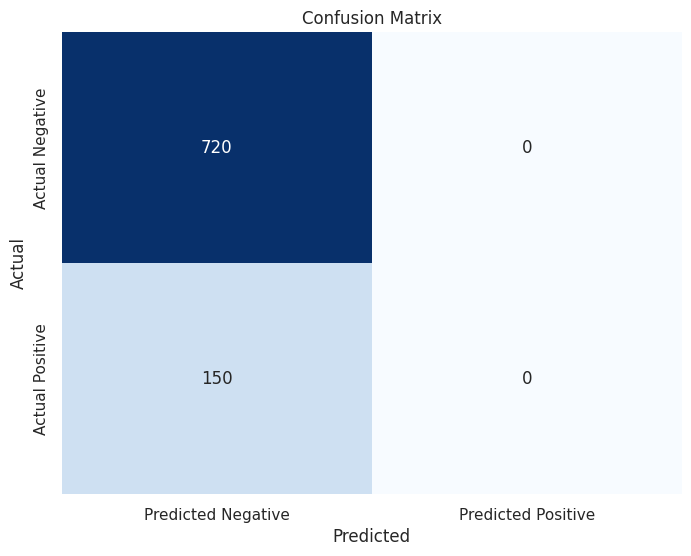

In [ ]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

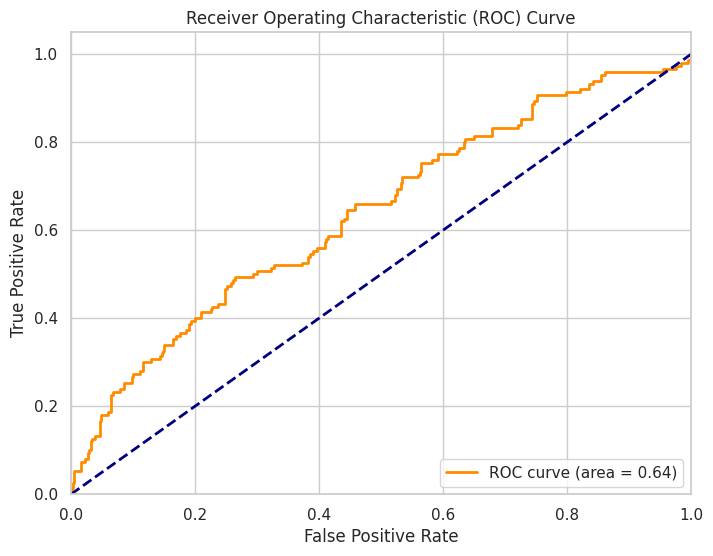

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Performing on Normalized Dataset

In [ ]:
# Model training (Logistic Regression)
l_n_model = LogisticRegression(random_state=42)
l_n_model.fit(n_X_train, n_y_train)

# Model evaluation
y_pred = l_n_model.predict(n_X_test)
y_prob = l_n_model.predict_proba(n_X_test)[:, 1]

# Classification metrics
accuracy = accuracy_score(n_y_test, y_pred)
precision = precision_score(n_y_test, y_pred)
recall = recall_score(n_y_test, y_pred)
f1 = f1_score(n_y_test, y_pred)
roc_auc = roc_auc_score(n_y_test, y_prob)
conf_matrix = confusion_matrix(n_y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8264367816091954
Precision: 0.3333333333333333
Recall: 0.006666666666666667
F1 Score: 0.013071895424836602
ROC AUC: 0.6648981481481482
Confusion Matrix:
 [[718   2]
 [149   1]]


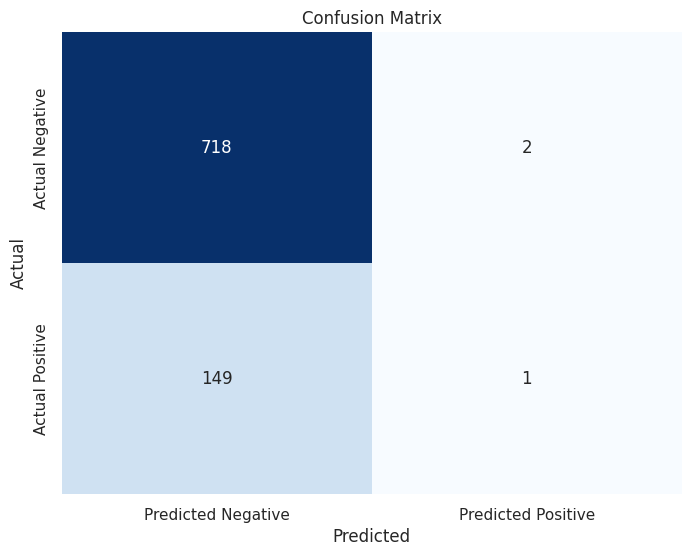

In [ ]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(n_y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

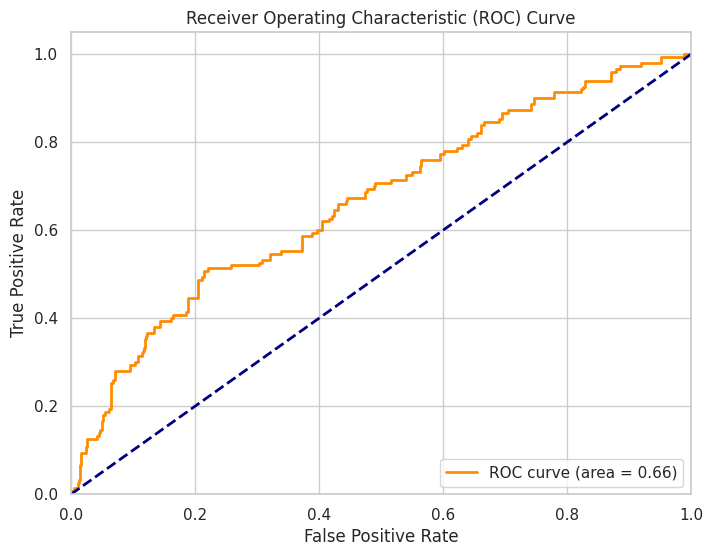

In [ ]:
fpr, tpr, thresholds = roc_curve(n_y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

## Performing on Regular Dataset

In [ ]:
d_model = DecisionTreeClassifier()
d_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = d_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, d_model.predict_proba(X_test)[:, 1])
confusion = confusion_matrix(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.9839080459770115
Precision: 0.9415584415584416
Recall: 0.9666666666666667
F1 Score: 0.9539473684210527
ROC-AUC Score: 0.9770833333333335
Confusion Matrix:
 [[711   9]
 [  5 145]]


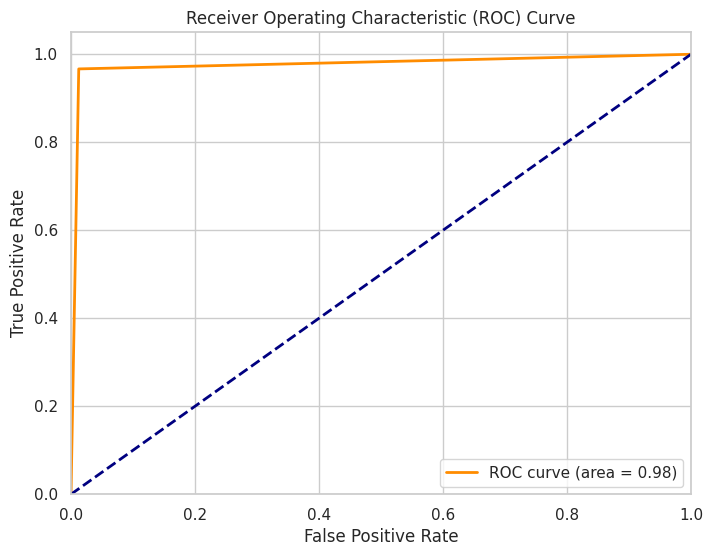

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, d_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

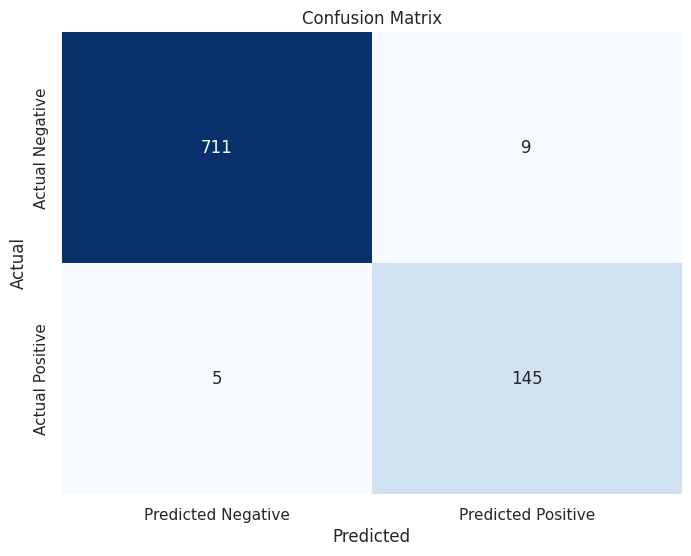

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Performing on Normalized Dataset

In [ ]:
d_n_model = DecisionTreeClassifier()
d_n_model.fit(n_X_train, n_y_train)

# Make predictions on the test data
y_pred = d_n_model.predict(n_X_test)

# Evaluation metrics
accuracy = accuracy_score(n_y_test, y_pred)
precision = precision_score(n_y_test, y_pred)
recall = recall_score(n_y_test, y_pred)
f1 = f1_score(n_y_test, y_pred)
roc_auc = roc_auc_score(n_y_test, d_n_model.predict_proba(X_test)[:, 1])
confusion = confusion_matrix(n_y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.9839080459770115
Precision: 0.9415584415584416
Recall: 0.9666666666666667
F1 Score: 0.9539473684210527
ROC-AUC Score: 0.4965277777777778
Confusion Matrix:
 [[711   9]
 [  5 145]]


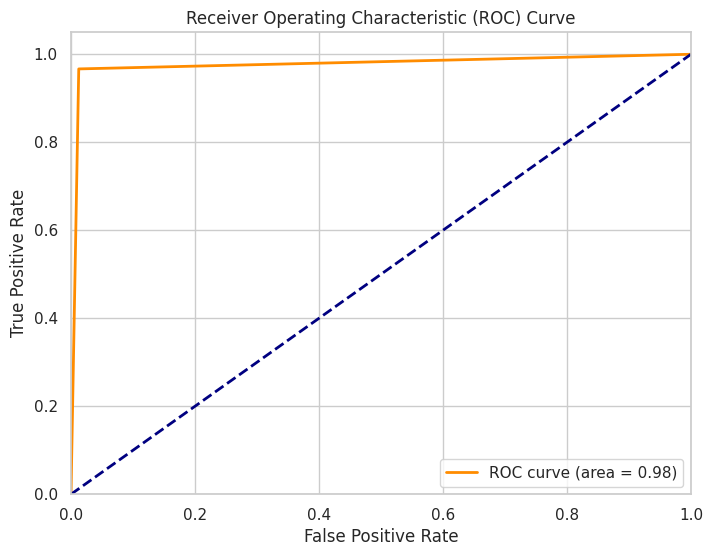

In [ ]:
fpr, tpr, thresholds = roc_curve(n_y_test, d_n_model.predict_proba(n_X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

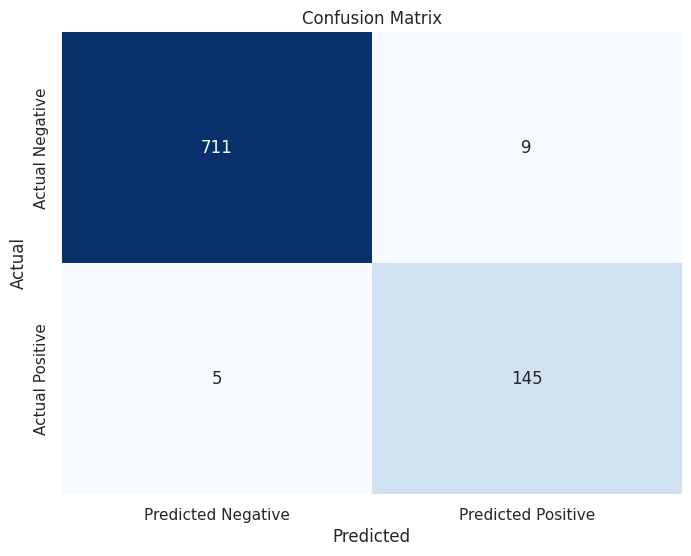

In [ ]:
conf_matrix = confusion_matrix(n_y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# SVM Classifier

## Performing on Regular Dataset

In [ ]:
svm = SVC(probability=True)  # You can set probability=True for ROC-AUC
svm.fit(X_train, y_train)

# Model evaluation
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8275862068965517
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.48178703703703707
Confusion Matrix:
 [[720   0]
 [150   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


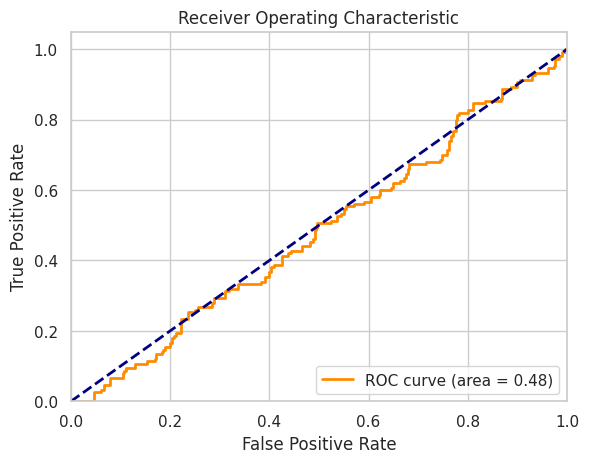

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

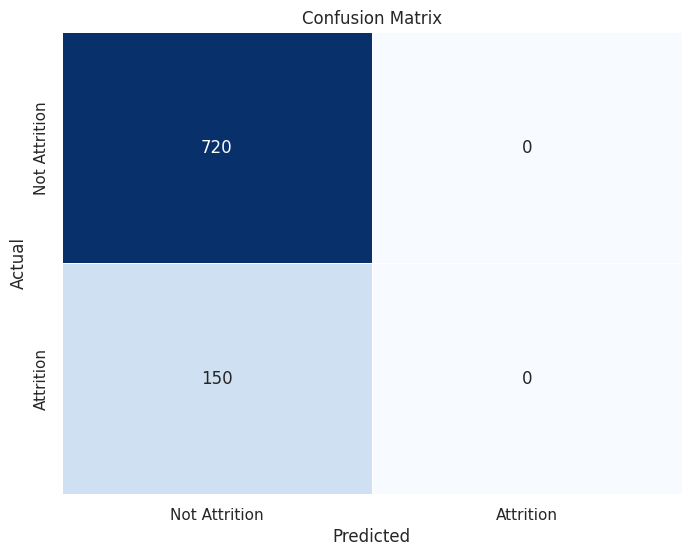

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False,
            xticklabels=['Not Attrition', 'Attrition'],
            yticklabels=['Not Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Performing on Scaled Dataset

In [ ]:
svm_n = SVC(probability=True)  # You can set probability=True for ROC-AUC
svm_n.fit(n_X_train, n_y_train)

# Model evaluation
y_pred = svm_n.predict(n_X_test)
y_prob = svm_n.predict_proba(n_X_test)[:, 1]  # Probability estimates for ROC-AUC

# Metrics
accuracy = accuracy_score(n_y_test, y_pred)
precision = precision_score(n_y_test, y_pred)
recall = recall_score(n_y_test, y_pred)
f1 = f1_score(n_y_test, y_pred)
roc_auc = roc_auc_score(n_y_test, y_prob)
conf_matrix = confusion_matrix(n_y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8402298850574713
Precision: 0.8666666666666667
Recall: 0.08666666666666667
F1-Score: 0.1575757575757576
ROC-AUC: 0.8268425925925926
Confusion Matrix:
 [[718   2]
 [137  13]]


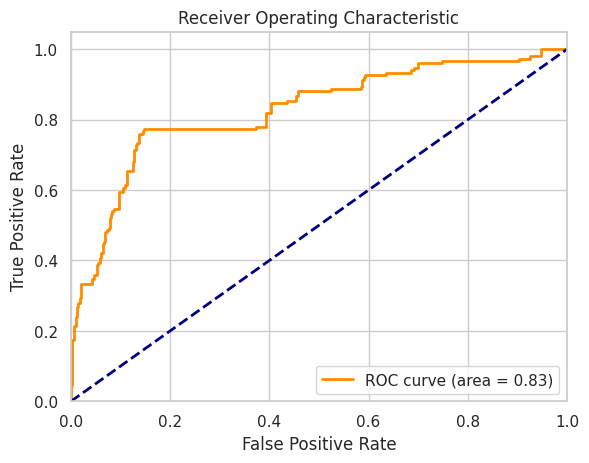

In [ ]:
fpr, tpr, thresholds = roc_curve(n_y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

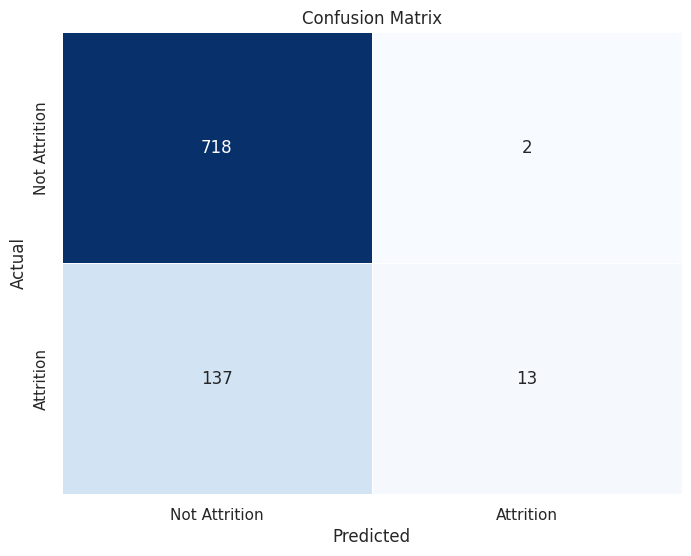

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(n_y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False,
            xticklabels=['Not Attrition', 'Attrition'],
            yticklabels=['Not Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# KNN Classifier

## Performing on Regular Dataset

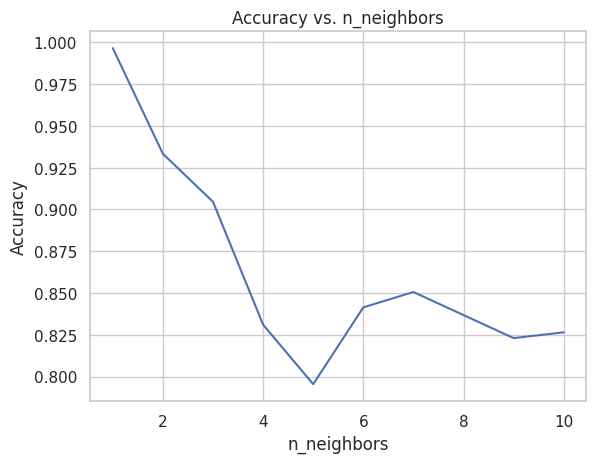

In [ ]:
#Elbow Method

k_values = range(1, 11)
accuracy_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores
import matplotlib.pyplot as plt
plt.plot(k_values, accuracy_scores)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_neighbors')
plt.show()


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,1])
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7954022988505747
Precision: 0.35106382978723405
Recall: 0.22
F1 Score: 0.27049180327868855
ROC AUC: 0.8770787037037037
Confusion Matrix:
 [[718   2]
 [137  13]]


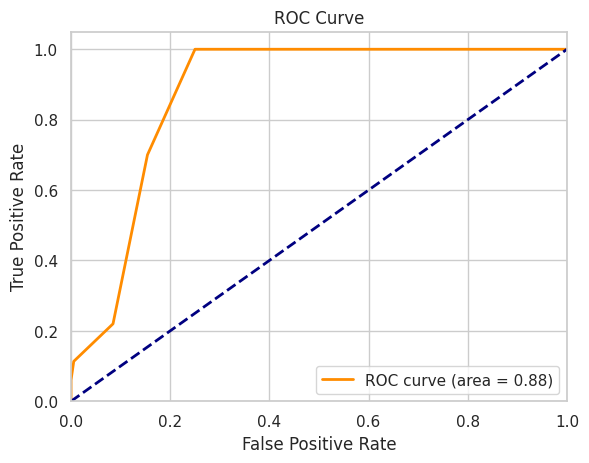

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

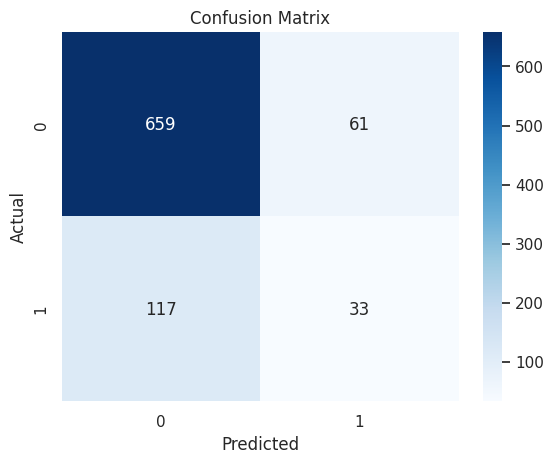

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Performing on Scaled Dataset

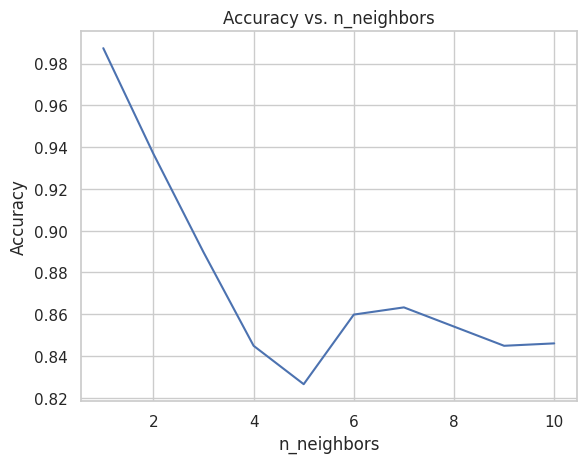

In [ ]:
#Elbow Method

k_values = range(1, 11)
accuracy_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(n_X_train, n_y_train)
    y_pred = knn_model.predict(n_X_test)
    accuracy = accuracy_score(n_y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores
import matplotlib.pyplot as plt
plt.plot(k_values, accuracy_scores)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_neighbors')
plt.show()


In [ ]:
knn_n_model = KNeighborsClassifier(n_neighbors=5)
knn_n_model.fit(n_X_train, n_y_train)
y_pred = knn_n_model.predict(n_X_test)
accuracy = accuracy_score(n_y_test, y_pred)
precision = precision_score(n_y_test, y_pred)
recall = recall_score(n_y_test, y_pred)
f1 = f1_score(n_y_test, y_pred)
roc_auc = roc_auc_score(n_y_test, knn_n_model.predict_proba(n_X_test)[:,1])
cm = confusion_matrix(n_y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8264367816091954
Precision: 0.49514563106796117
Recall: 0.34
F1 Score: 0.4031620553359684
ROC AUC: 0.8852777777777778
Confusion Matrix:
 [[718   2]
 [137  13]]


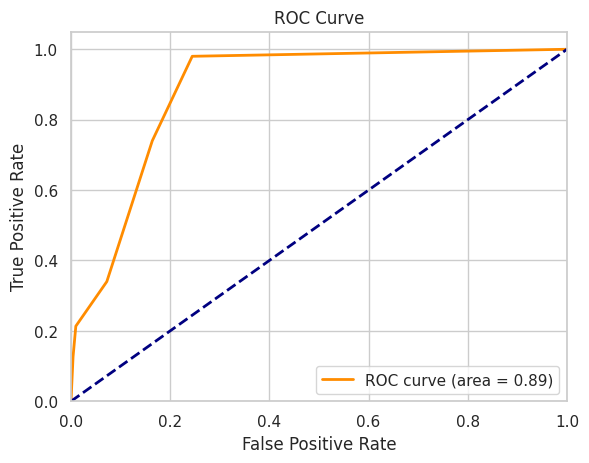

In [ ]:
fpr, tpr, thresholds = roc_curve(n_y_test, knn_n_model.predict_proba(n_X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

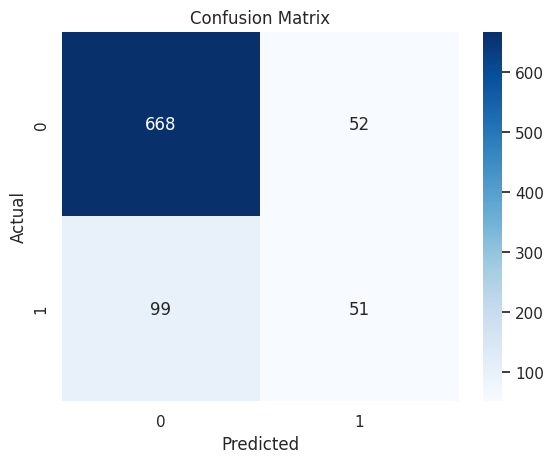

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Above we have implemented four classification methods on the dataset. We have performed the four methods on both regular as well as normalized data. We see the models tend to work better on normalized data. So, in the next section, we are building an ensemble model. The ensemble will perform the classification on normalized data, will perform all the classification methods on the dataset and then select the result with the best accuracy.

# Ensemble Model

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define individual classifiers
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
svm_classifier = SVC(probability=True)  # Note the probability=True for calculating class probabilities
knn_classifier = KNeighborsClassifier()

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('lr', logistic_regression),
    ('dt', decision_tree),
    ('svm', svm_classifier),
    ('knn', knn_classifier)
], voting='soft')  # 'soft' for weighted voting based on class probabilities

# Fit the ensemble model on your training data
ensemble_model.fit(n_X_train, n_y_train)

# Make predictions using the ensemble model
y_pred = ensemble_model.predict(n_X_test)

accuracy = accuracy_score(n_y_test, y_pred)
report = classification_report(n_y_test, y_pred)
confusion = confusion_matrix(n_y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.9091954022988505
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       720
           1       1.00      0.47      0.64       150

    accuracy                           0.91       870
   macro avg       0.95      0.74      0.80       870
weighted avg       0.92      0.91      0.90       870

Confusion Matrix:
 [[720   0]
 [ 79  71]]


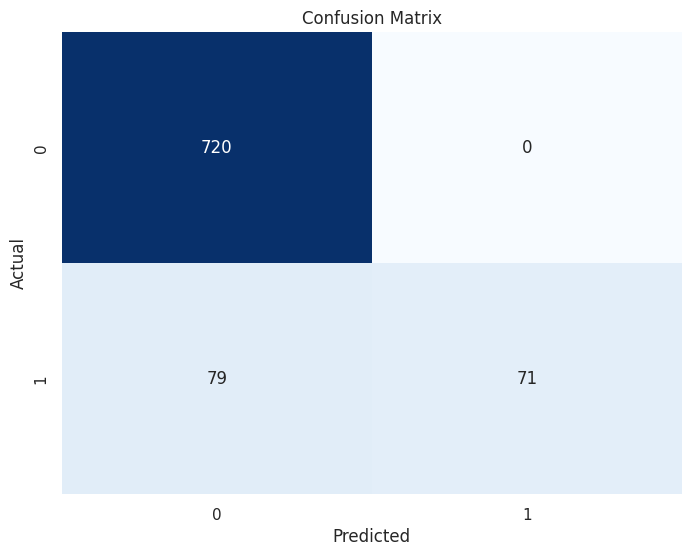

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ROC-AUC Score: 0.9703888888888887


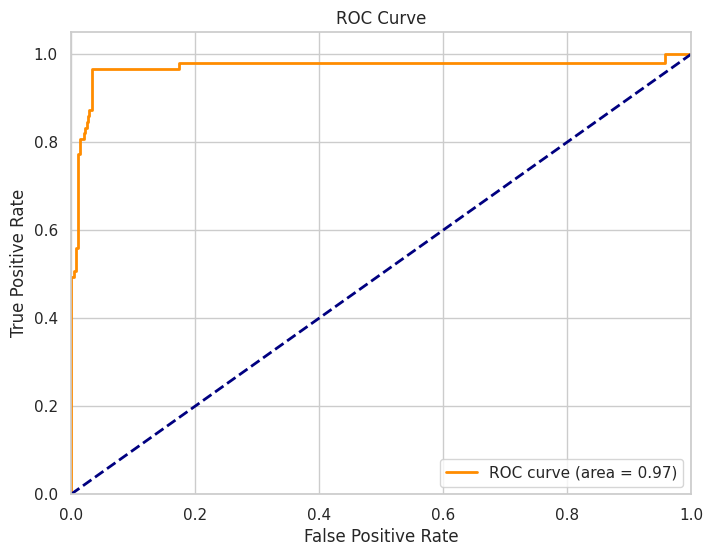

In [ ]:
# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, ensemble_model.predict_proba(n_X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ensemble_model.predict_proba(n_X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()